# Test Report

In [1]:
# !pip install openpyxl
# !pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

In [2]:
Original_measurments = pd.read_excel('A. Annealing test.xlsx',
                                     usecols='A:H,R',skiprows = 7)
Original_measurments['Type'] = "Original Measurements"
Original_measurments.tail()

,Group,Id,Voc [V],Isc [A],FF [%],η [%],Rserie [mΩ],Rshunt [mΩ],Notes,Type
65,V,1.510291e+09,0.635,6.597,71.400002,13.277,7.499618,1485.165039,15min annealing in coinstack,Original Measurements
66,V,1.510291e+09,0.633,6.562,71.199997,13.126,7.452113,2040.825073,15min annealing in coinstack,Original Measurements
67,V,1.510291e+09,0.640,6.600,70.599998,13.242,7.517376,2054.822754,15min annealing in coinstack,Original Measurements
68,V,1.510291e+09,0.637,6.566,71.400002,13.255,7.331909,2027.017334,15min annealing in coinstack,Original Measurements
69,V,1.510291e+09,0.638,6.515,70.800003,13.064,7.317156,1408.429810,15min annealing in coinstack,Original Measurements


In [3]:
Remeasure_b_annealing = pd.read_excel('A. Annealing test.xlsx',
                                     usecols='I:R',skiprows = 7,keep_default_na = False)
Remeasure_b_annealing.columns=Remeasure_b_annealing.columns.str.replace(r'.1', '')
Remeasure_b_annealing['Type'] = "Remeasure Before Annealing"
Remeasure_b_annealing = Remeasure_b_annealing.drop(columns=['Unnamed:6'])
Remeasure_b_annealing.head()

/Users/maxandchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Group,Id,Voc [V],Isc [A],FF [%],η [%],Rserie [mΩ],Rshunt [mΩ],Notes,Type
0,I,1511100796,0.641,6.528,68.599998,12.743,7.349692,1734.138916,2h annealing in cassettes,Remeasure Before Annealing
1,I,1511100798,0.638,6.5,69.300003,12.752,7.528696,1463.435669,2h annealing in cassettes,Remeasure Before Annealing
2,I,1511100799,0.636,6.498,68.900002,12.624,7.603422,1621.634766,2h annealing in cassettes,Remeasure Before Annealing
3,I,1511100802,0.634,6.573,67.900002,12.557,7.727072,1369.851929,2h annealing in cassettes,Remeasure Before Annealing
4,I,1511100803,0.632,6.54,68,12.477,7.600221,1604.267578,2h annealing in cassettes,Remeasure Before Annealing


In [4]:
Remeasure_a_annealing = pd.read_excel('A. Annealing test.xlsx',
                                     usecols='S:Z,R',skiprows = 7,keep_default_na = False)
Remeasure_a_annealing.columns = Remeasure_a_annealing.columns.str.replace(r'.2', '')
Remeasure_a_annealing['Type'] = "Remeasure After Annealing"
Remeasure_a_annealing.head()

/Users/maxandchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Notes,Group,Id,Voc [V],Isc [A],FF [%],η [%],Rserie [mΩ],Rshunt [mΩ],Type
0,2h annealing in cassettes,I,1511100796,0.622,6.363,65.199997,11.457,8.154295,671.138794,Remeasure After Annealing
1,2h annealing in cassettes,I,1511100798,0.629,6.469,70.800003,12.788,7.41509,1764.734741,Remeasure After Annealing
2,2h annealing in cassettes,I,1511100799,0.628,6.419,70.300003,12.566,7.667529,1734.091064,Remeasure After Annealing
3,2h annealing in cassettes,I,1511100802,0.629,6.496,69,12.517,7.646422,1140.686401,Remeasure After Annealing
4,2h annealing in cassettes,I,1511100803,0.628,6.445,70.099998,12.593,7.478048,1435.389648,Remeasure After Annealing


In [5]:
frames = [Original_measurments, Remeasure_b_annealing, Remeasure_a_annealing]
Annealing_test = pd.concat(frames)
Annealing_test.columns

Index(['Group', 'Id', 'Voc [V]', 'Isc [A]', 'FF [%]', 'η [%]', 'Rserie [mΩ]',
       'Rshunt [mΩ]', 'Notes', 'Type'],
      dtype='object')

In [6]:
# Annealing_test.astype({col: float for col in Annealing_test.columns[3:5]}) 
Annealing_test[['Voc [V]', 'Isc [A]', 'FF [%]', 'η [%]', 'Rserie [mΩ]', 
                'Rshunt [mΩ]']] = Annealing_test[['Voc [V]', 'Isc [A]', 'FF [%]', 'η [%]', 'Rserie [mΩ]',
       'Rshunt [mΩ]']].apply(pd.to_numeric)
Annealing_test = Annealing_test.dropna()
Annealing_test.tail()

,Group,Id,Voc [V],Isc [A],FF [%],η [%],Rserie [mΩ],Rshunt [mΩ],Notes,Type
65,V,1511100966,0.628,6.638,69.699997,12.885,7.854242,1515.173828,15min annealing in coinstack,Remeasure After Annealing
66,V,1511100967,0.630,6.654,69.900002,12.996,7.709498,1570.665039,15min annealing in coinstack,Remeasure After Annealing
67,V,1511100974,0.627,6.675,68.300003,12.681,7.753457,1310.037720,15min annealing in coinstack,Remeasure After Annealing
68,V,1511100977,0.627,6.635,68.800003,12.699,7.668727,1428.545288,15min annealing in coinstack,Remeasure After Annealing
69,V,1511100978,0.633,6.518,68.500000,12.548,7.899511,1149.418335,15min annealing in coinstack,Remeasure After Annealing


In [132]:
Annealing_test_wide = pd.read_excel('A. Annealing test.xlsx', #usecols='I:R',
                                     skiprows = 7,keep_default_na = False)
Annealing_test_wide = Annealing_test_wide.drop(columns=['Unnamed: 16'])
Annealing_test_wide[['Voc [V]', 'Isc [A]', 'FF [%]', 'η [%]', 'Rserie [mΩ]',
       'Rshunt [mΩ]', 'Voc [V].1', 'Isc [A].1', 'FF [%].1',
       'η [%].1', 'Rserie [mΩ].1', 'Rshunt [mΩ].1',
       'Voc [V].2', 'Isc [A].2', 'FF [%].2', 'η [%].2', 'Rserie [mΩ].2',
       'Rshunt [mΩ].2']] = Annealing_test_wide[['Voc [V]', 'Isc [A]', 'FF [%]', 'η [%]', 'Rserie [mΩ]',
       'Rshunt [mΩ]', 'Voc [V].1', 'Isc [A].1', 'FF [%].1',
       'η [%].1', 'Rserie [mΩ].1', 'Rshunt [mΩ].1',
       'Voc [V].2', 'Isc [A].2', 'FF [%].2', 'η [%].2', 'Rserie [mΩ].2',
       'Rshunt [mΩ].2']].apply(pd.to_numeric)

Annealing_test_wide = Annealing_test_wide.dropna()

Annealing_test_wide["Voc_PLbA"] = (- Annealing_test_wide["Voc [V].1"] + Annealing_test_wide["Voc [V]"]) / Annealing_test_wide["Voc [V]"]
Annealing_test_wide["Voc_PLaA"] = (- Annealing_test_wide["Voc [V].2"] + Annealing_test_wide["Voc [V]"]) / Annealing_test_wide["Voc [V]"]

Annealing_test_wide["Isc_PLbA"] = (- Annealing_test_wide["Isc [A].1"] + Annealing_test_wide["Isc [A]"]) / Annealing_test_wide["Isc [A]"]
Annealing_test_wide["Isc_PLaA"] = (- Annealing_test_wide["Isc [A].2"] + Annealing_test_wide["Isc [A]"]) / Annealing_test_wide["Isc [A]"]


Annealing_test_wide["FF_PLbA"] = (- Annealing_test_wide["FF [%].1"] + Annealing_test_wide["FF [%]"]) / Annealing_test_wide["FF [%]"]
Annealing_test_wide["FF_PLaA"] = (- Annealing_test_wide["FF [%].2"] + Annealing_test_wide["FF [%]"]) / Annealing_test_wide["FF [%]"]

Annealing_test_wide["η_PLbA"] = (-Annealing_test_wide["η [%].1"] + Annealing_test_wide["η [%]"]) / Annealing_test_wide["η [%]"]
Annealing_test_wide["η_PLaA"] = (-Annealing_test_wide["η [%].2"] + Annealing_test_wide["η [%]"]) / Annealing_test_wide["η [%]"]

Annealing_test_wide["Rserie_PLbA"] = (-Annealing_test_wide["Rserie [mΩ].1"] + Annealing_test_wide["Rserie [mΩ]"]) / Annealing_test_wide["Rserie [mΩ]"]
Annealing_test_wide["Rserie_PLaA"] = (-Annealing_test_wide["Rserie [mΩ].2"] + Annealing_test_wide["Rserie [mΩ]"]) / Annealing_test_wide["Rserie [mΩ]"]

Annealing_test_wide["Rshunt_PLbA"] = (-Annealing_test_wide["Rshunt [mΩ].1"] + Annealing_test_wide["Rshunt [mΩ]"]) / Annealing_test_wide["Rshunt [mΩ]"]
Annealing_test_wide["Rshunt_PLaA"] = (-Annealing_test_wide["Rshunt [mΩ].2"] + Annealing_test_wide["Rshunt [mΩ]"]) / Annealing_test_wide["Rshunt [mΩ]"]
Annealing_test_wide = Annealing_test_wide.dropna()

Annealing_test_wide.head()

,Group,Id,Voc [V],Isc [A],FF [%],η [%],Rserie [mΩ],Rshunt [mΩ],Group.1,Id.1,...,Isc_PLbA,Isc_PLaA,FF_PLbA,FF_PLaA,η_PLbA,η_PLaA,Rserie_PLbA,Rserie_PLaA,Rshunt_PLbA,Rshunt_PLaA
0,I,1510290796,0.633,6.468,71.699997,13.038,7.024438,1874.968262,I,1511100796,...,-0.009276,0.016234,0.043236,0.090656,0.022626,0.121261,-0.046303,-0.160847,0.075110,0.642053
1,I,1510290798,0.641,6.484,72.400002,13.366,7.152323,2307.690186,I,1511100798,...,-0.002468,0.002313,0.042818,0.022099,0.045937,0.043244,-0.052622,-0.036739,0.365844,0.235281
2,I,1510290799,0.639,6.421,72.300003,13.171,7.006229,1470.584717,I,1511100799,...,-0.011992,0.000311,0.047026,0.027663,0.041531,0.045934,-0.085237,-0.094387,-0.102714,-0.179185
3,I,1510290802,0.637,6.535,71.199997,13.166,7.042247,2000.017822,I,1511100802,...,-0.005815,0.005968,0.046348,0.030899,0.046256,0.049294,-0.097245,-0.085793,0.315080,0.429662
4,I,1510290803,0.636,6.479,71.599998,13.104,7.064157,1910.844727,I,1511100803,...,-0.009415,0.005248,0.050279,0.020950,0.047848,0.038996,-0.075885,-0.058590,0.160441,0.248819


# Step 1:  Check if experiment data are good enough.

Outliers need to be removed based on standard rules.

# Section 2: I-V plot

Isc : Short circuit current

Voc : Open circuit voltage

### Which group has the most overlap of green cross and blue dots?

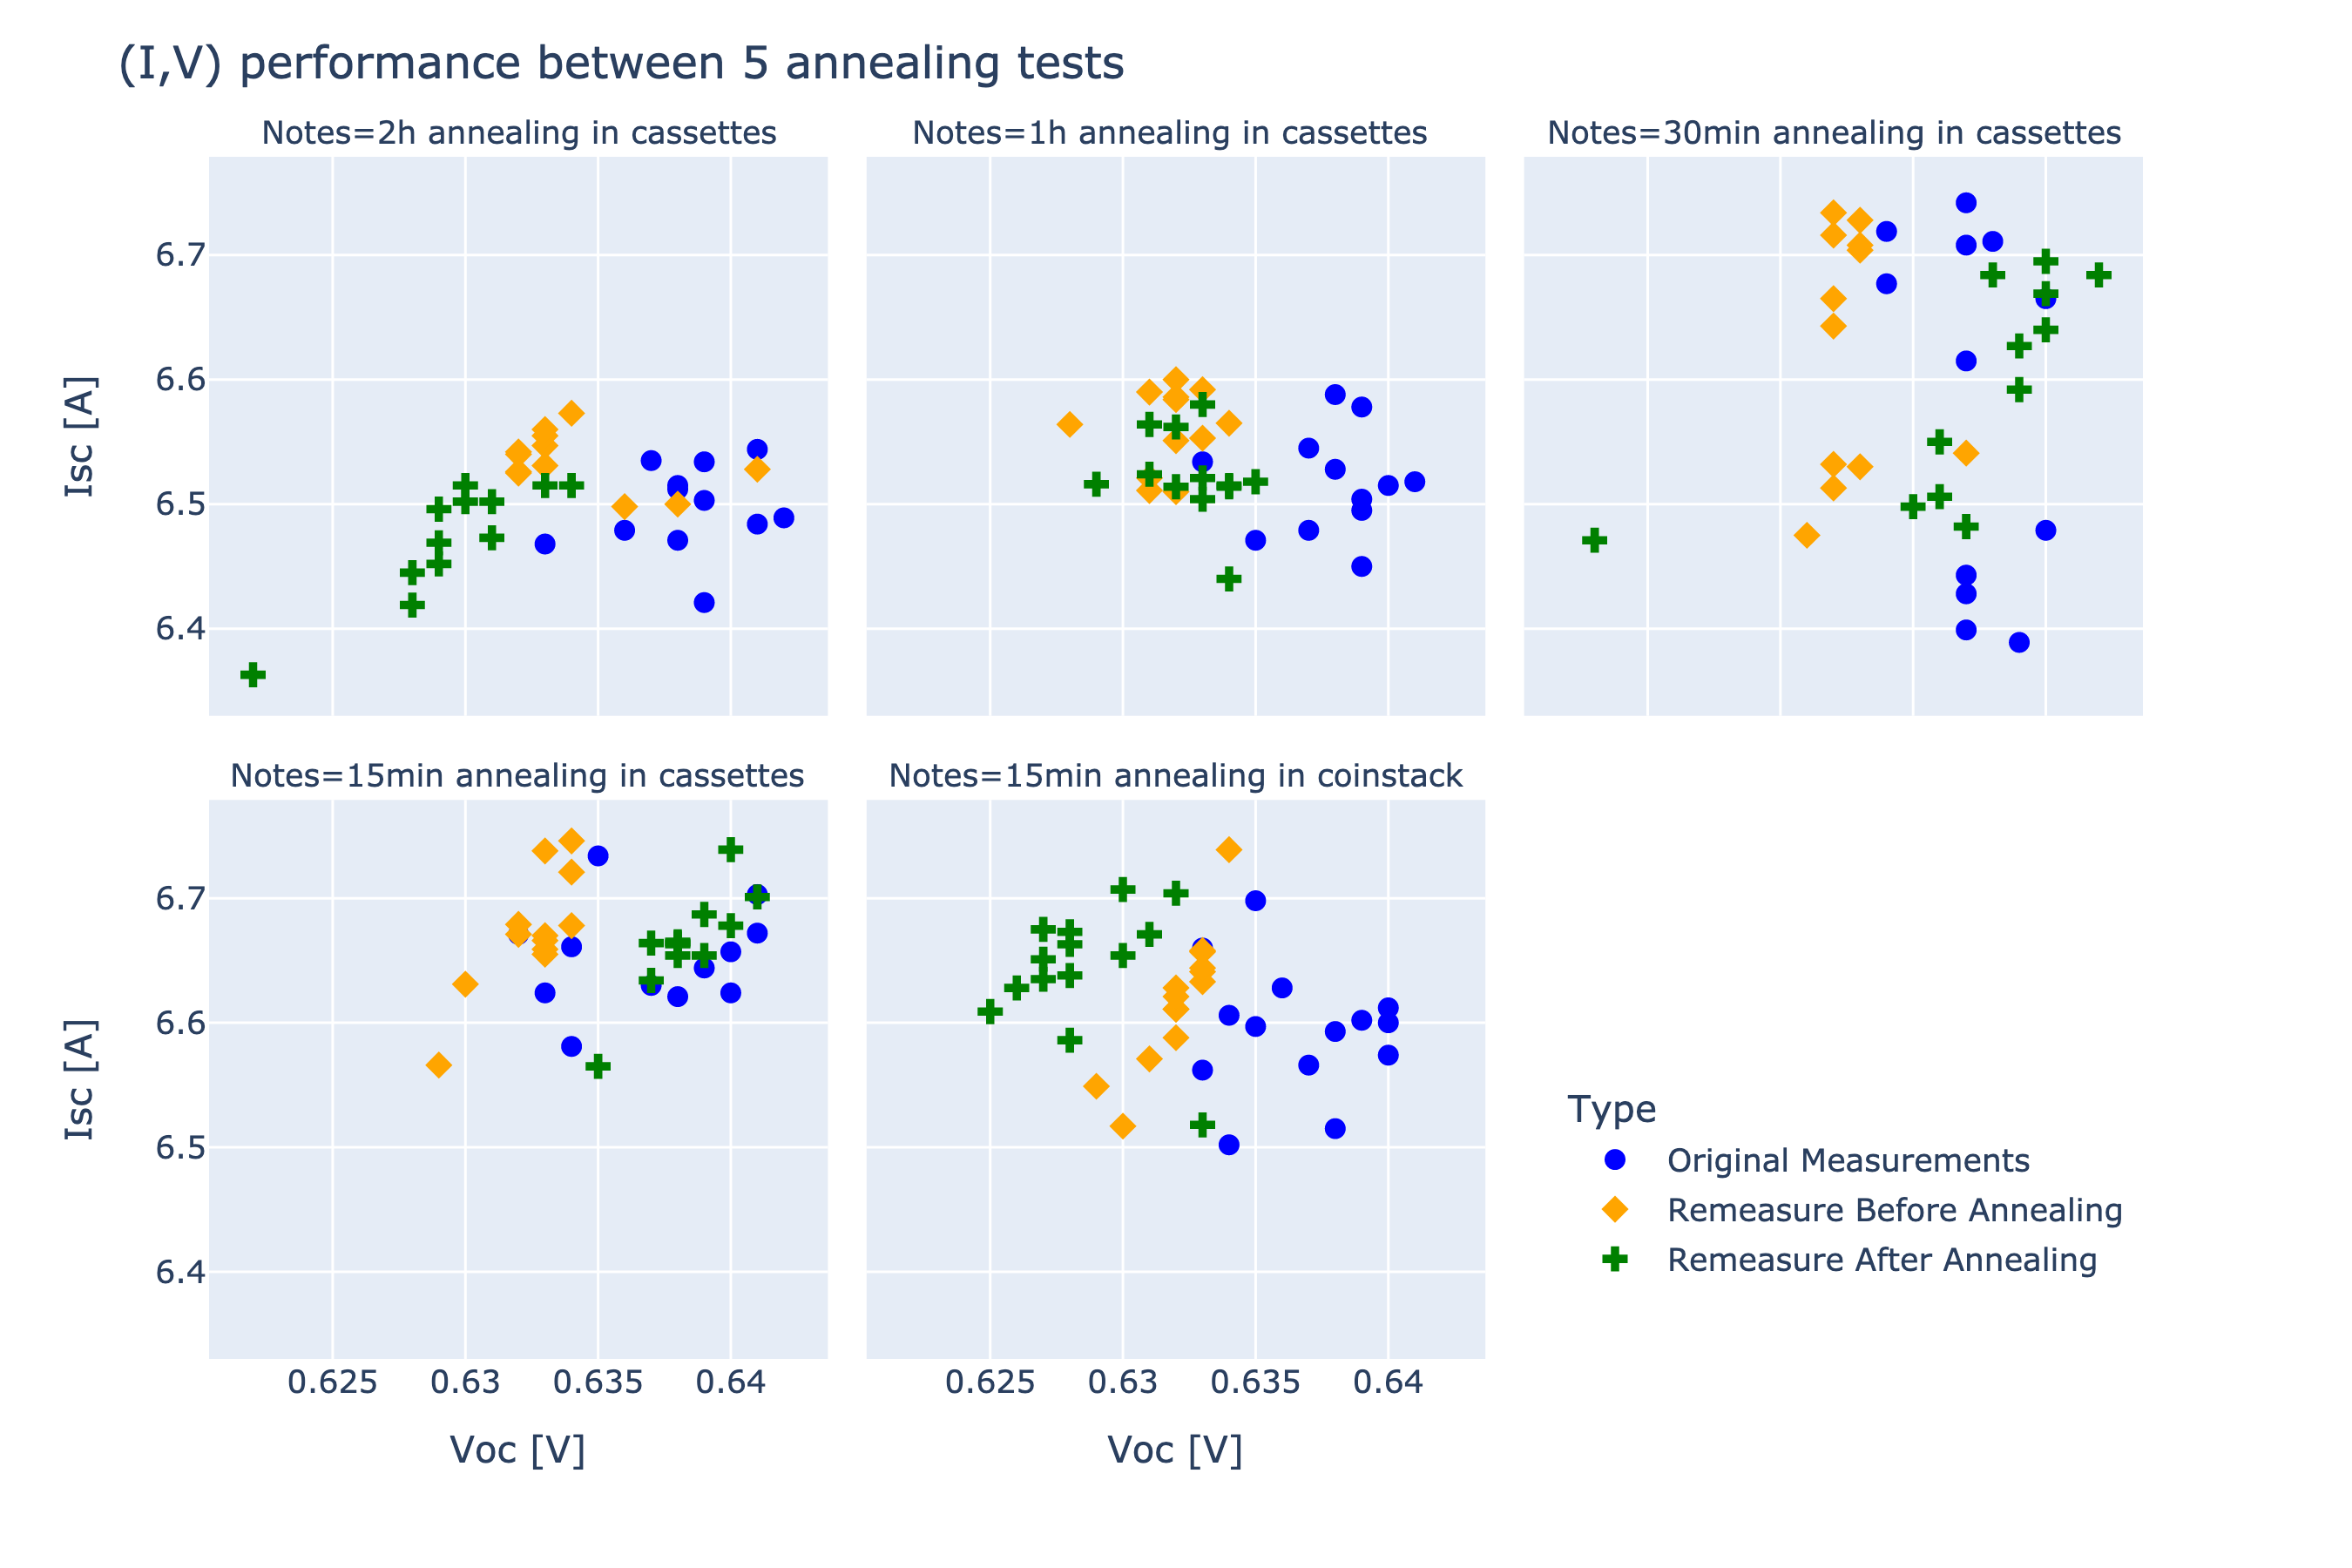

In [157]:
fig_IV = px.scatter(Annealing_test, x="Voc [V]", y="Isc [A]", 
                 color="Type", facet_col="Notes",
                 color_discrete_sequence = ["blue","orange", "green"],
                 symbol_sequence=["circle","diamond","cross"],
                symbol="Type", facet_col_wrap=3)
fig_IV.update_traces(marker_size=8)
fig_IV.update_layout(title="(I,V) performance between 5 annealing tests",
                  legend=dict(y=0.05, x=0.7)
                 )
fig_IV.write_image("2.1 (I,V) performance between 5 annealing tests.png", scale=3, width=900, height=600) 
fig_IV.show(renderer="png", scale=3, width=900, height=600)

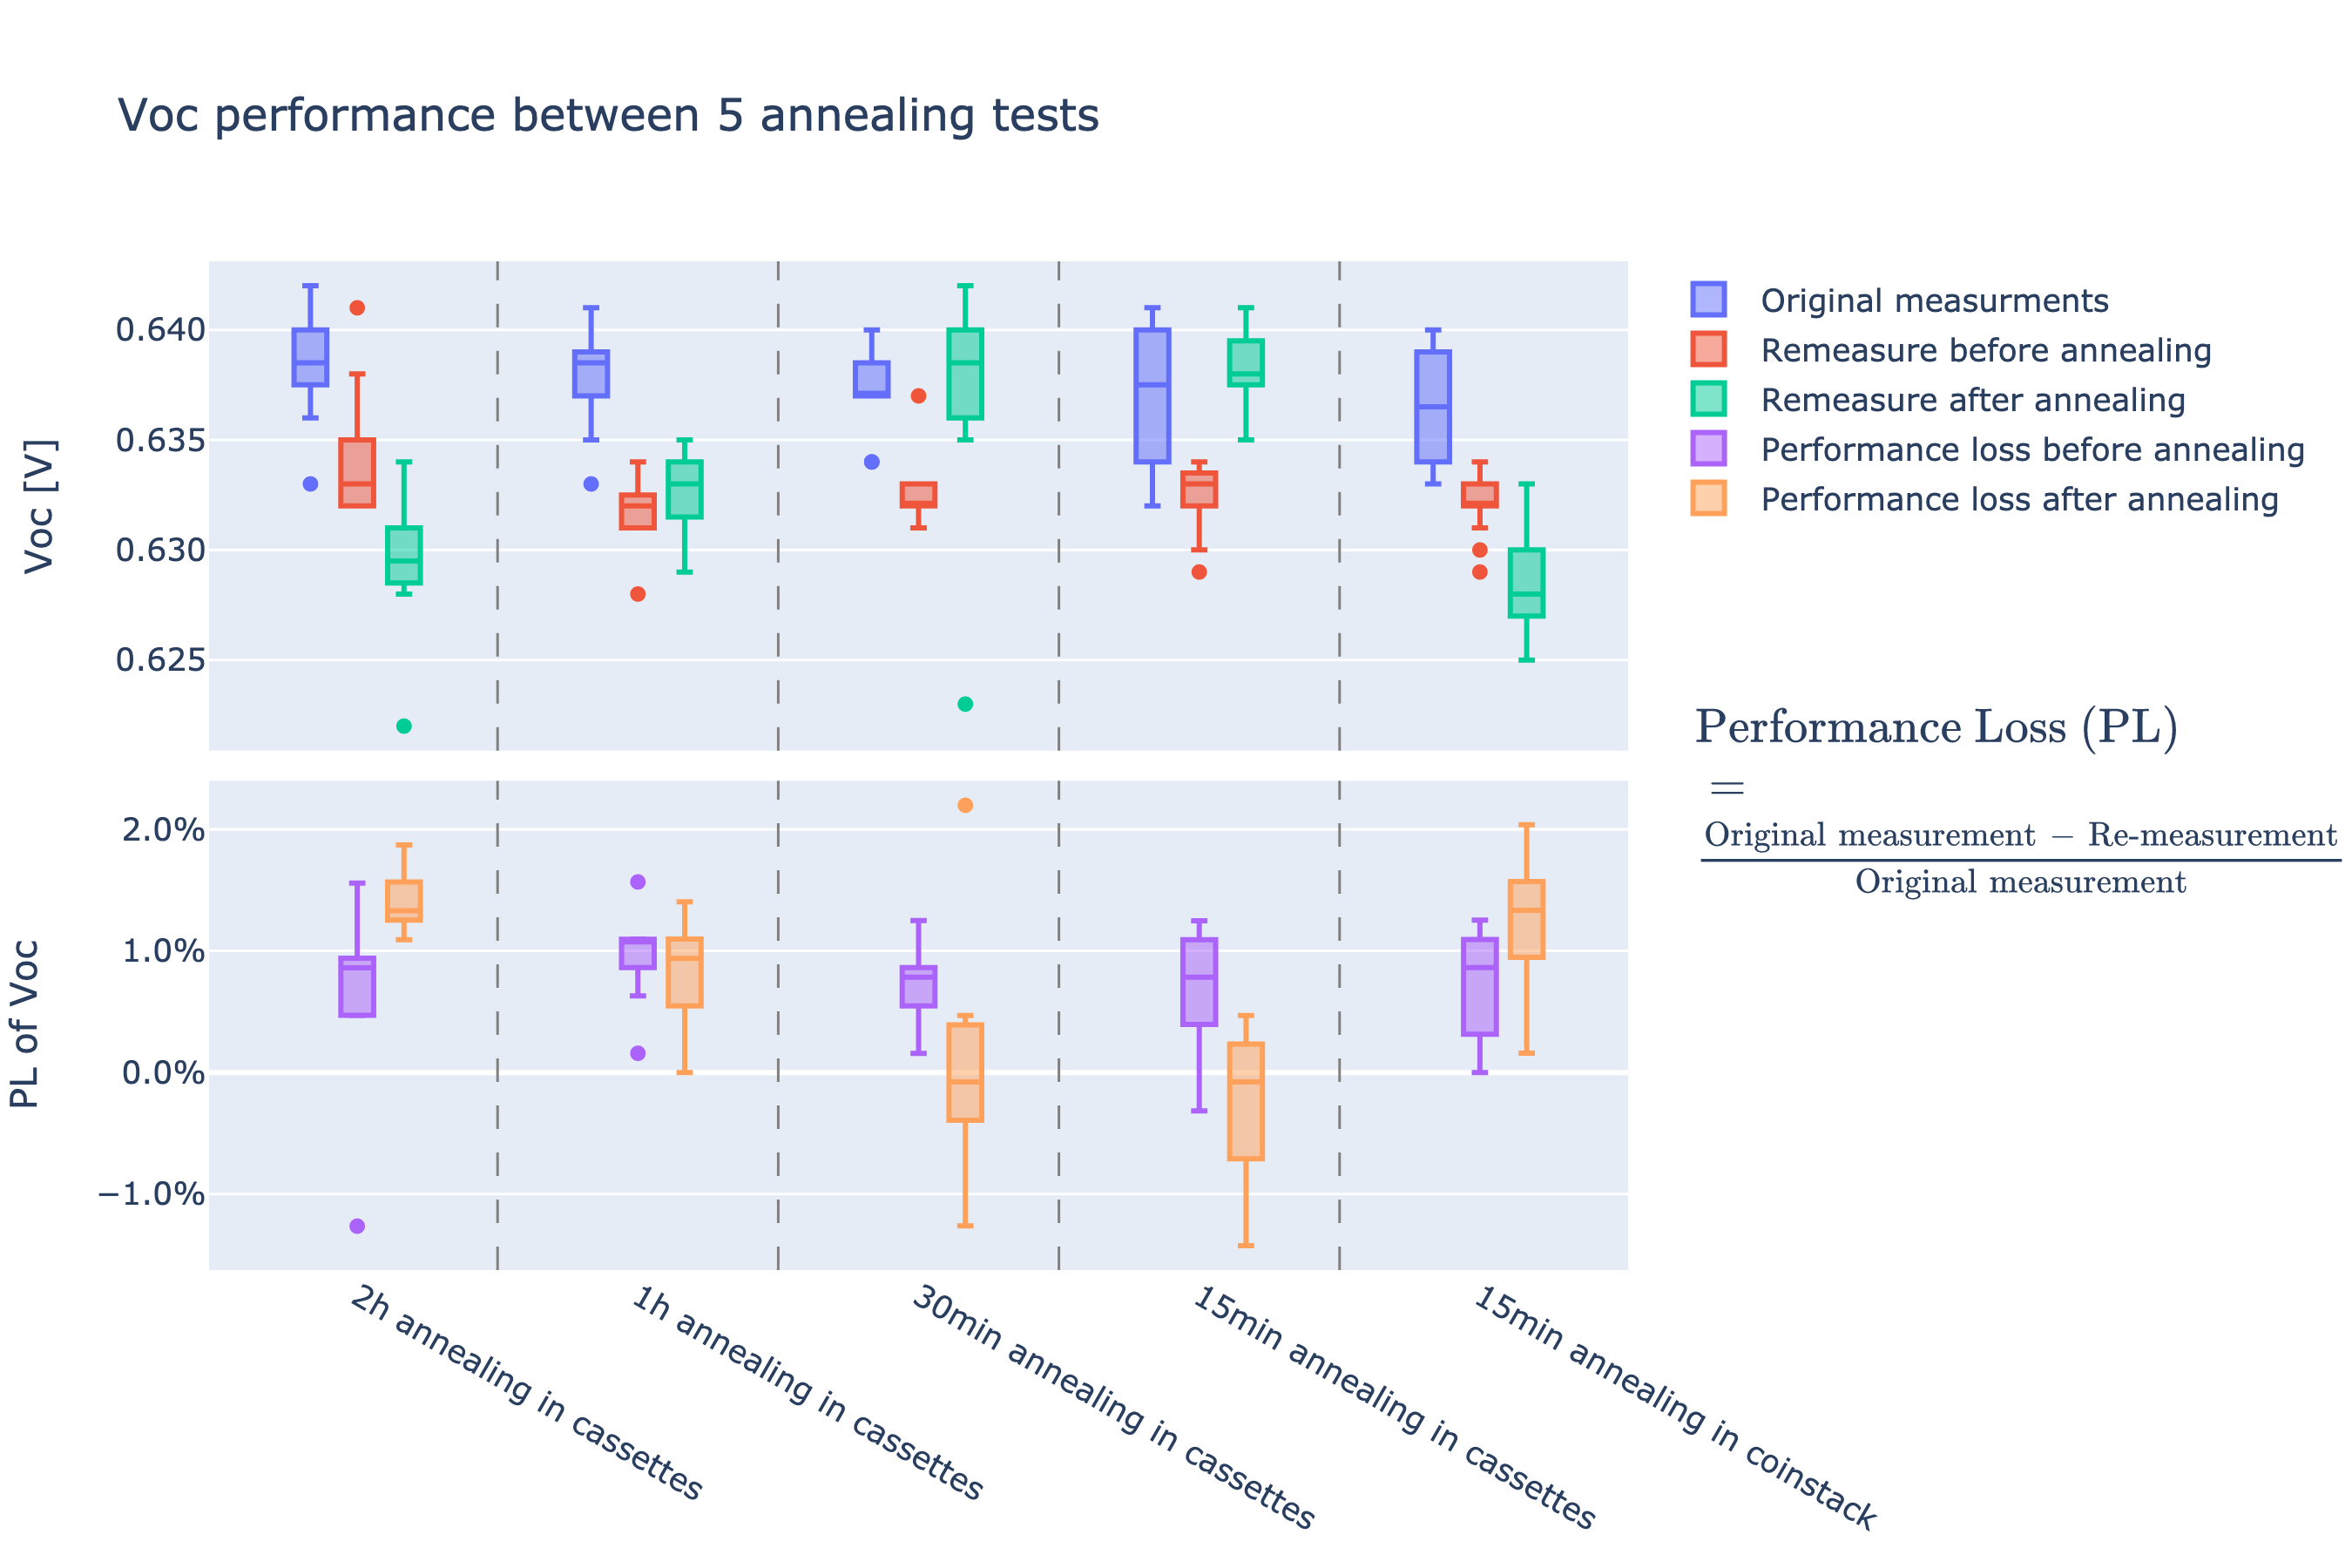

In [158]:
Annealing_test_wide_V = Annealing_test_wide[Annealing_test_wide['Voc_PLaA'] < 0.1]
Annealing_test_wide_V = Annealing_test_wide_V[Annealing_test_wide_V['Voc_PLbA'] < 0.1]

fig_V = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_V.add_trace(
    go.Box(y=Annealing_test_wide_V['Voc [V]'], x = Annealing_test_wide_V["Notes"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_V.add_trace(
    go.Box(y=Annealing_test_wide_V['Voc [V].1'], x = Annealing_test_wide_V["Notes"], 
           name = "Remeasure before annealing", offsetgroup = "B"),
    row=1, col=1
)

fig_V.add_trace(
    go.Box(y=Annealing_test_wide_V['Voc [V].2'], x = Annealing_test_wide_V["Notes"], 
           name = "Remeasure after annealing", offsetgroup = "C"),
    row=1, col=1,
)

fig_V.add_trace(
    go.Box(y=Annealing_test_wide_V['Voc_PLbA'], x = Annealing_test_wide_V["Notes"], 
           name = "Performance loss before annealing", offsetgroup = "B"),
    row=2, col=1
)

fig_V.add_trace(
    go.Box(y=Annealing_test_wide_V['Voc_PLaA'], x = Annealing_test_wide_V["Notes"], 
           name = "Performance loss after annealing", offsetgroup = "C"),
    row=2, col=1
)
vx = 0.5
fig_V.add_vline(x=vx, line_width=1, line_dash="dash", line_color="grey")
fig_V.add_vline(x=vx+1, line_width=1, line_dash="dash", line_color="grey")
fig_V.add_vline(x=vx+2, line_width=1, line_dash="dash", line_color="grey")
fig_V.add_vline(x=vx+3, line_width=1, line_dash="dash", line_color="grey")

fig_V.add_annotation(yref='paper', xref='paper', y=0.5,x = 1.35,showarrow=False, font_size =18,
            text=r'$ \textrm{ Performance Loss (PL) } \\\ = \\\ \frac{\textrm{Original measurement } - \textrm{ Re-measurement}}{\textrm{Original measurement}}$')

fig_V.update_layout(title="Voc performance between 5 annealing tests",
                     boxmode='group', height=600, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="Voc [V]", tickformat=".3f"),
                     yaxis2=dict(title="PL of Voc", tickformat=".1%")
                    ) 
fig_V.show(renderer="png", scale=3, width=900, height=600)
fig_V.write_image("2.1.V Voc performance between 5 annealing tests.png", scale=3, width=900, height=600) 

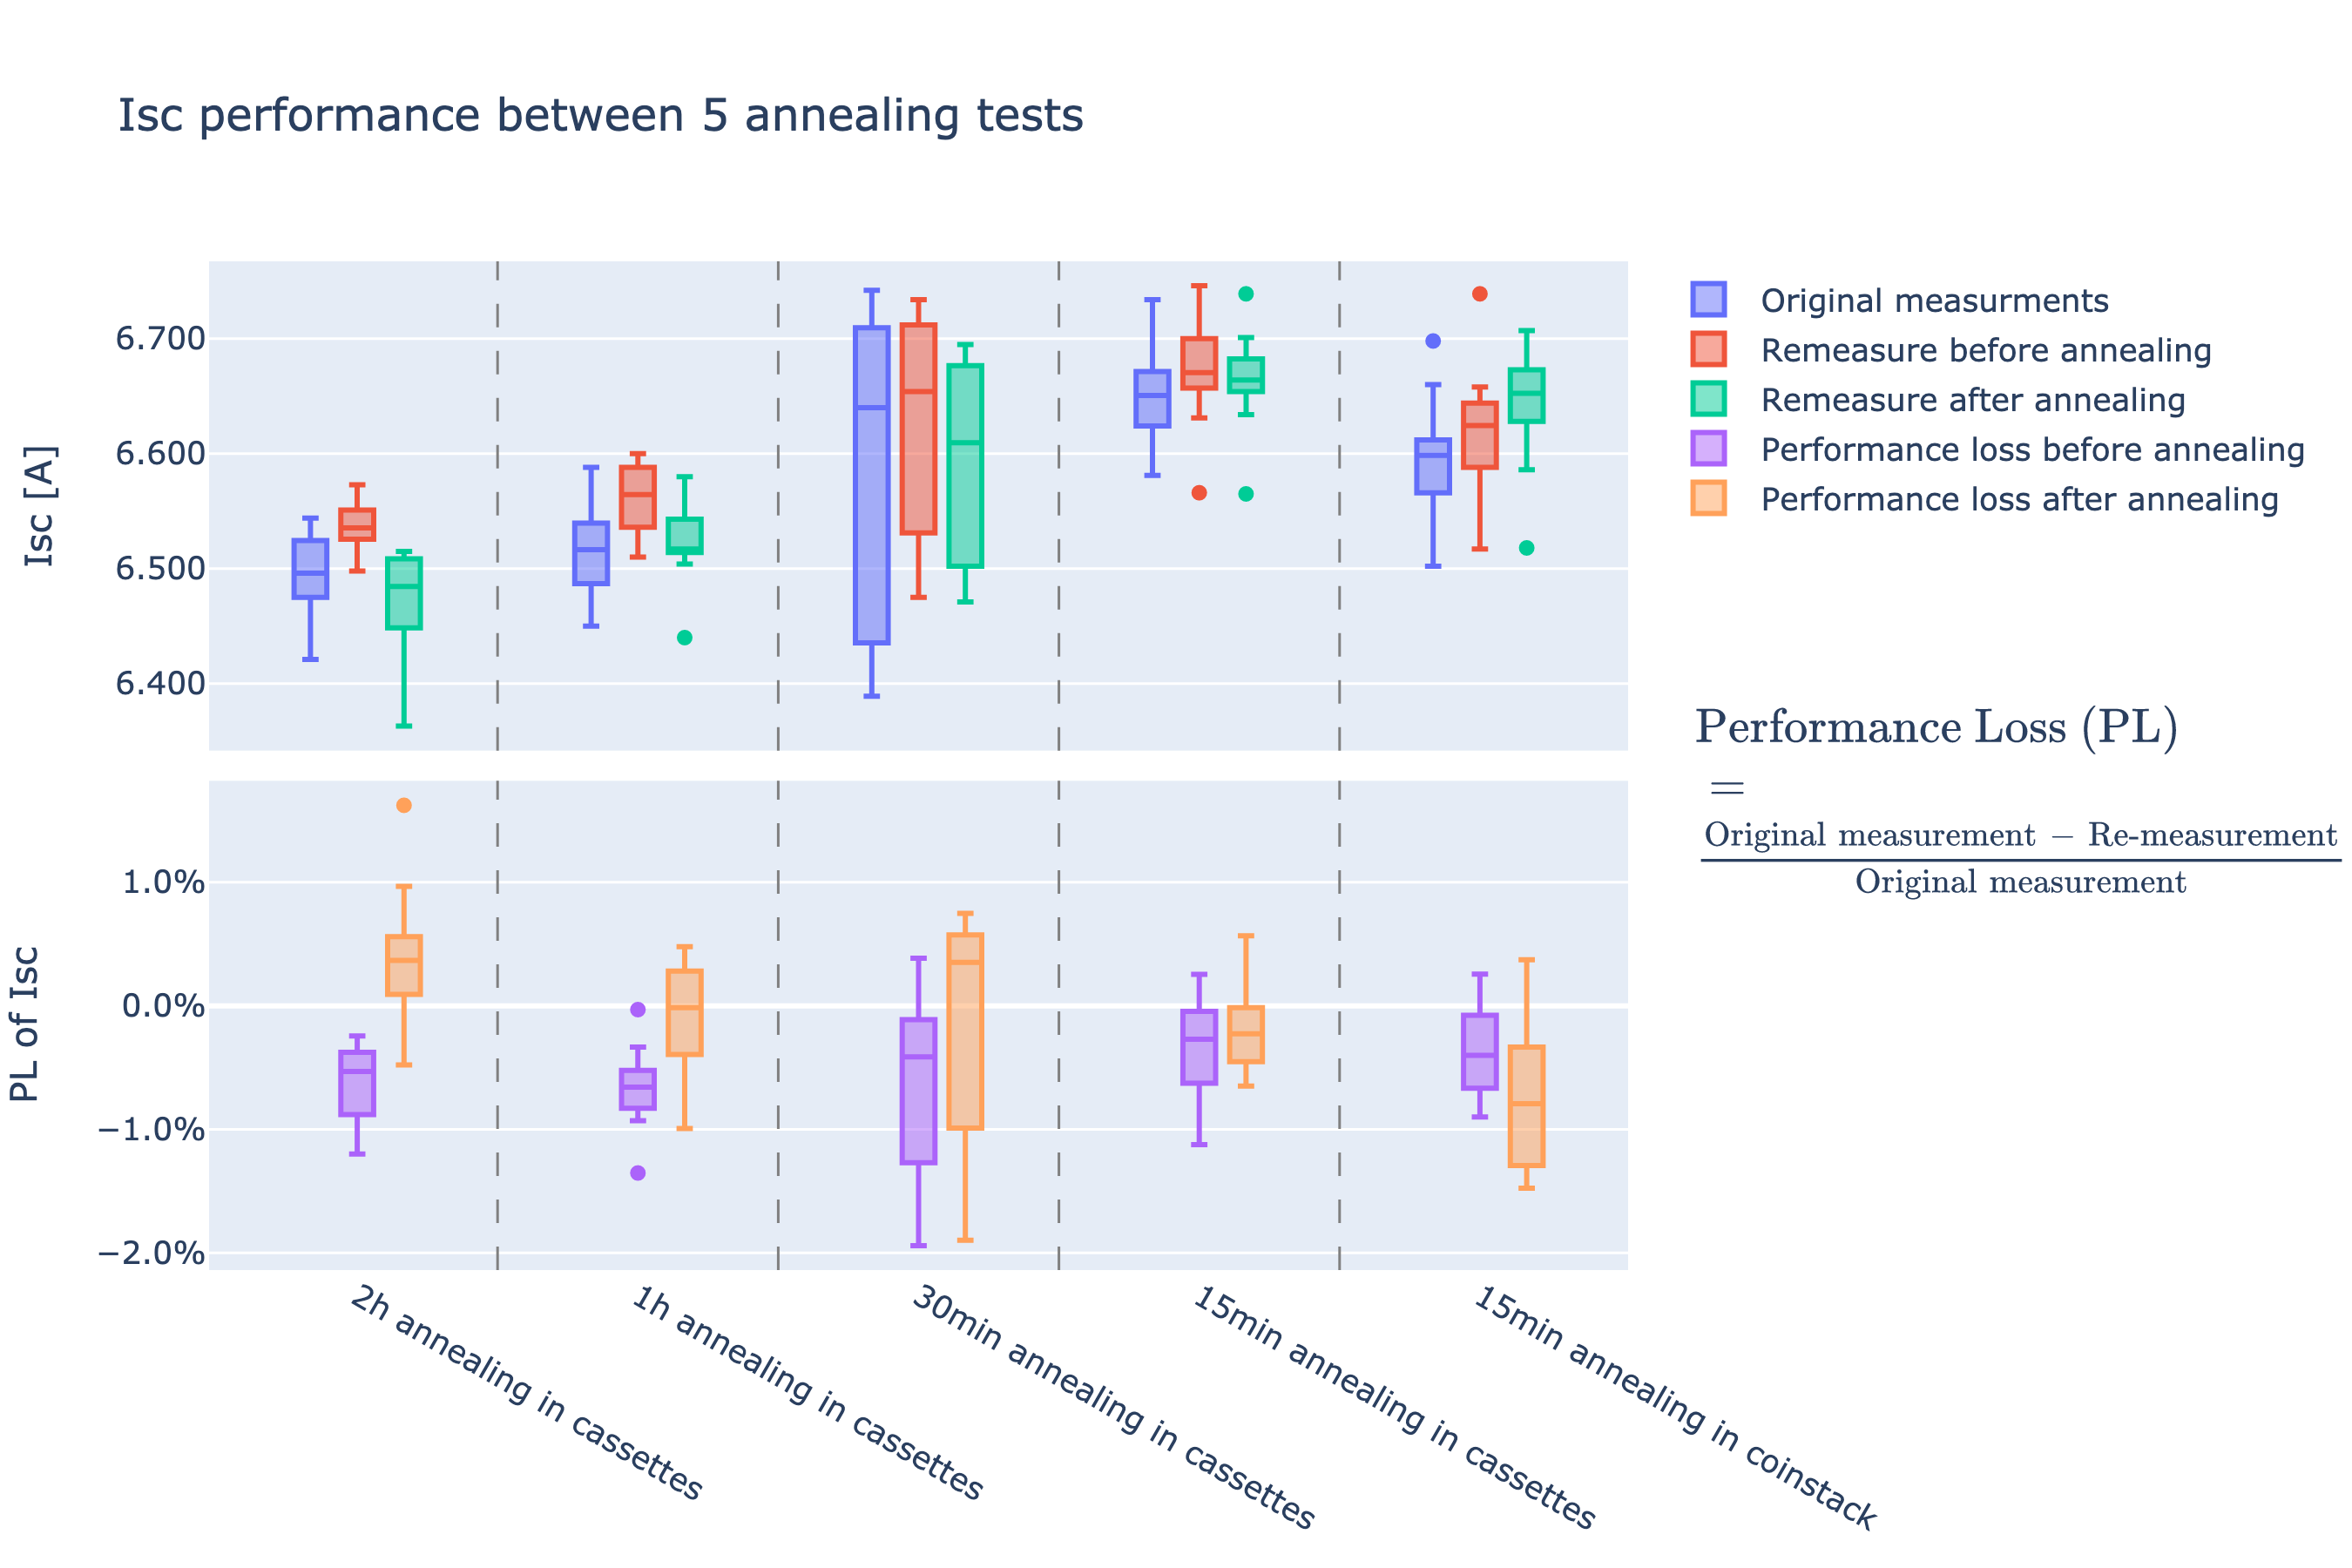

In [159]:
Annealing_test_wide_I = Annealing_test_wide[Annealing_test_wide['Isc_PLaA'] < 0.1]
Annealing_test_wide_I = Annealing_test_wide_I[Annealing_test_wide_I['Isc_PLbA'] < 0.1]

fig_I = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_I.add_trace(
    go.Box(y=Annealing_test_wide_I['Isc [A]'], x = Annealing_test_wide_I["Notes"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_I.add_trace(
    go.Box(y=Annealing_test_wide_I['Isc [A].1'], x = Annealing_test_wide_I["Notes"], 
           name = "Remeasure before annealing", offsetgroup = "B"),
    row=1, col=1
)

fig_I.add_trace(
    go.Box(y=Annealing_test_wide_I['Isc [A].2'], x = Annealing_test_wide_I["Notes"], 
           name = "Remeasure after annealing", offsetgroup = "C"),
    row=1, col=1,
)

fig_I.add_trace(
    go.Box(y=Annealing_test_wide_I['Isc_PLbA'], x = Annealing_test_wide_I["Notes"], 
           name = "Performance loss before annealing", offsetgroup = "B"),
    row=2, col=1
)

fig_I.add_trace(
    go.Box(y=Annealing_test_wide_I['Isc_PLaA'], x = Annealing_test_wide_I["Notes"], 
           name = "Performance loss after annealing", offsetgroup = "C"),
    row=2, col=1
)
vx = 0.5
fig_I.add_vline(x=vx, line_width=1, line_dash="dash", line_color="grey")
fig_I.add_vline(x=vx+1, line_width=1, line_dash="dash", line_color="grey")
fig_I.add_vline(x=vx+2, line_width=1, line_dash="dash", line_color="grey")
fig_I.add_vline(x=vx+3, line_width=1, line_dash="dash", line_color="grey")

fig_I.add_annotation(yref='paper', xref='paper', y=0.5,x = 1.35,showarrow=False, font_size =18,
            text=r'$ \textrm{ Performance Loss (PL) } \\\ = \\\ \frac{\textrm{Original measurement } - \textrm{ Re-measurement}}{\textrm{Original measurement}}$')

fig_I.update_layout(title="Isc performance between 5 annealing tests",
                     boxmode='group', height=600, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="Isc [A]", tickformat=".3f"),
                     yaxis2=dict(title="PL of Isc", tickformat=".1%")
                    ) 
fig_I.show(renderer="png", scale=3, width=900, height=600)
fig_I.write_image("2.1.I Isc performance between 5 annealing tests.png", scale=3, width=900, height=600) 

# Section 3 : Check Fill Factor

Fill factor : the higher the more efficient. < 22.6%

Define functions :

Performance Loss before Annealing : PLbA

$PLbA =  \frac{\textrm{Original measurements } - \textrm{ Measurements before annealing}}{\textrm{Original measurements}} $

Performance Loss after Annealing : PLaA

$PLaA =  \frac{\textrm{Original measurements } - \textrm{ Measurements after annealing}}{\textrm{Original measurements}} $

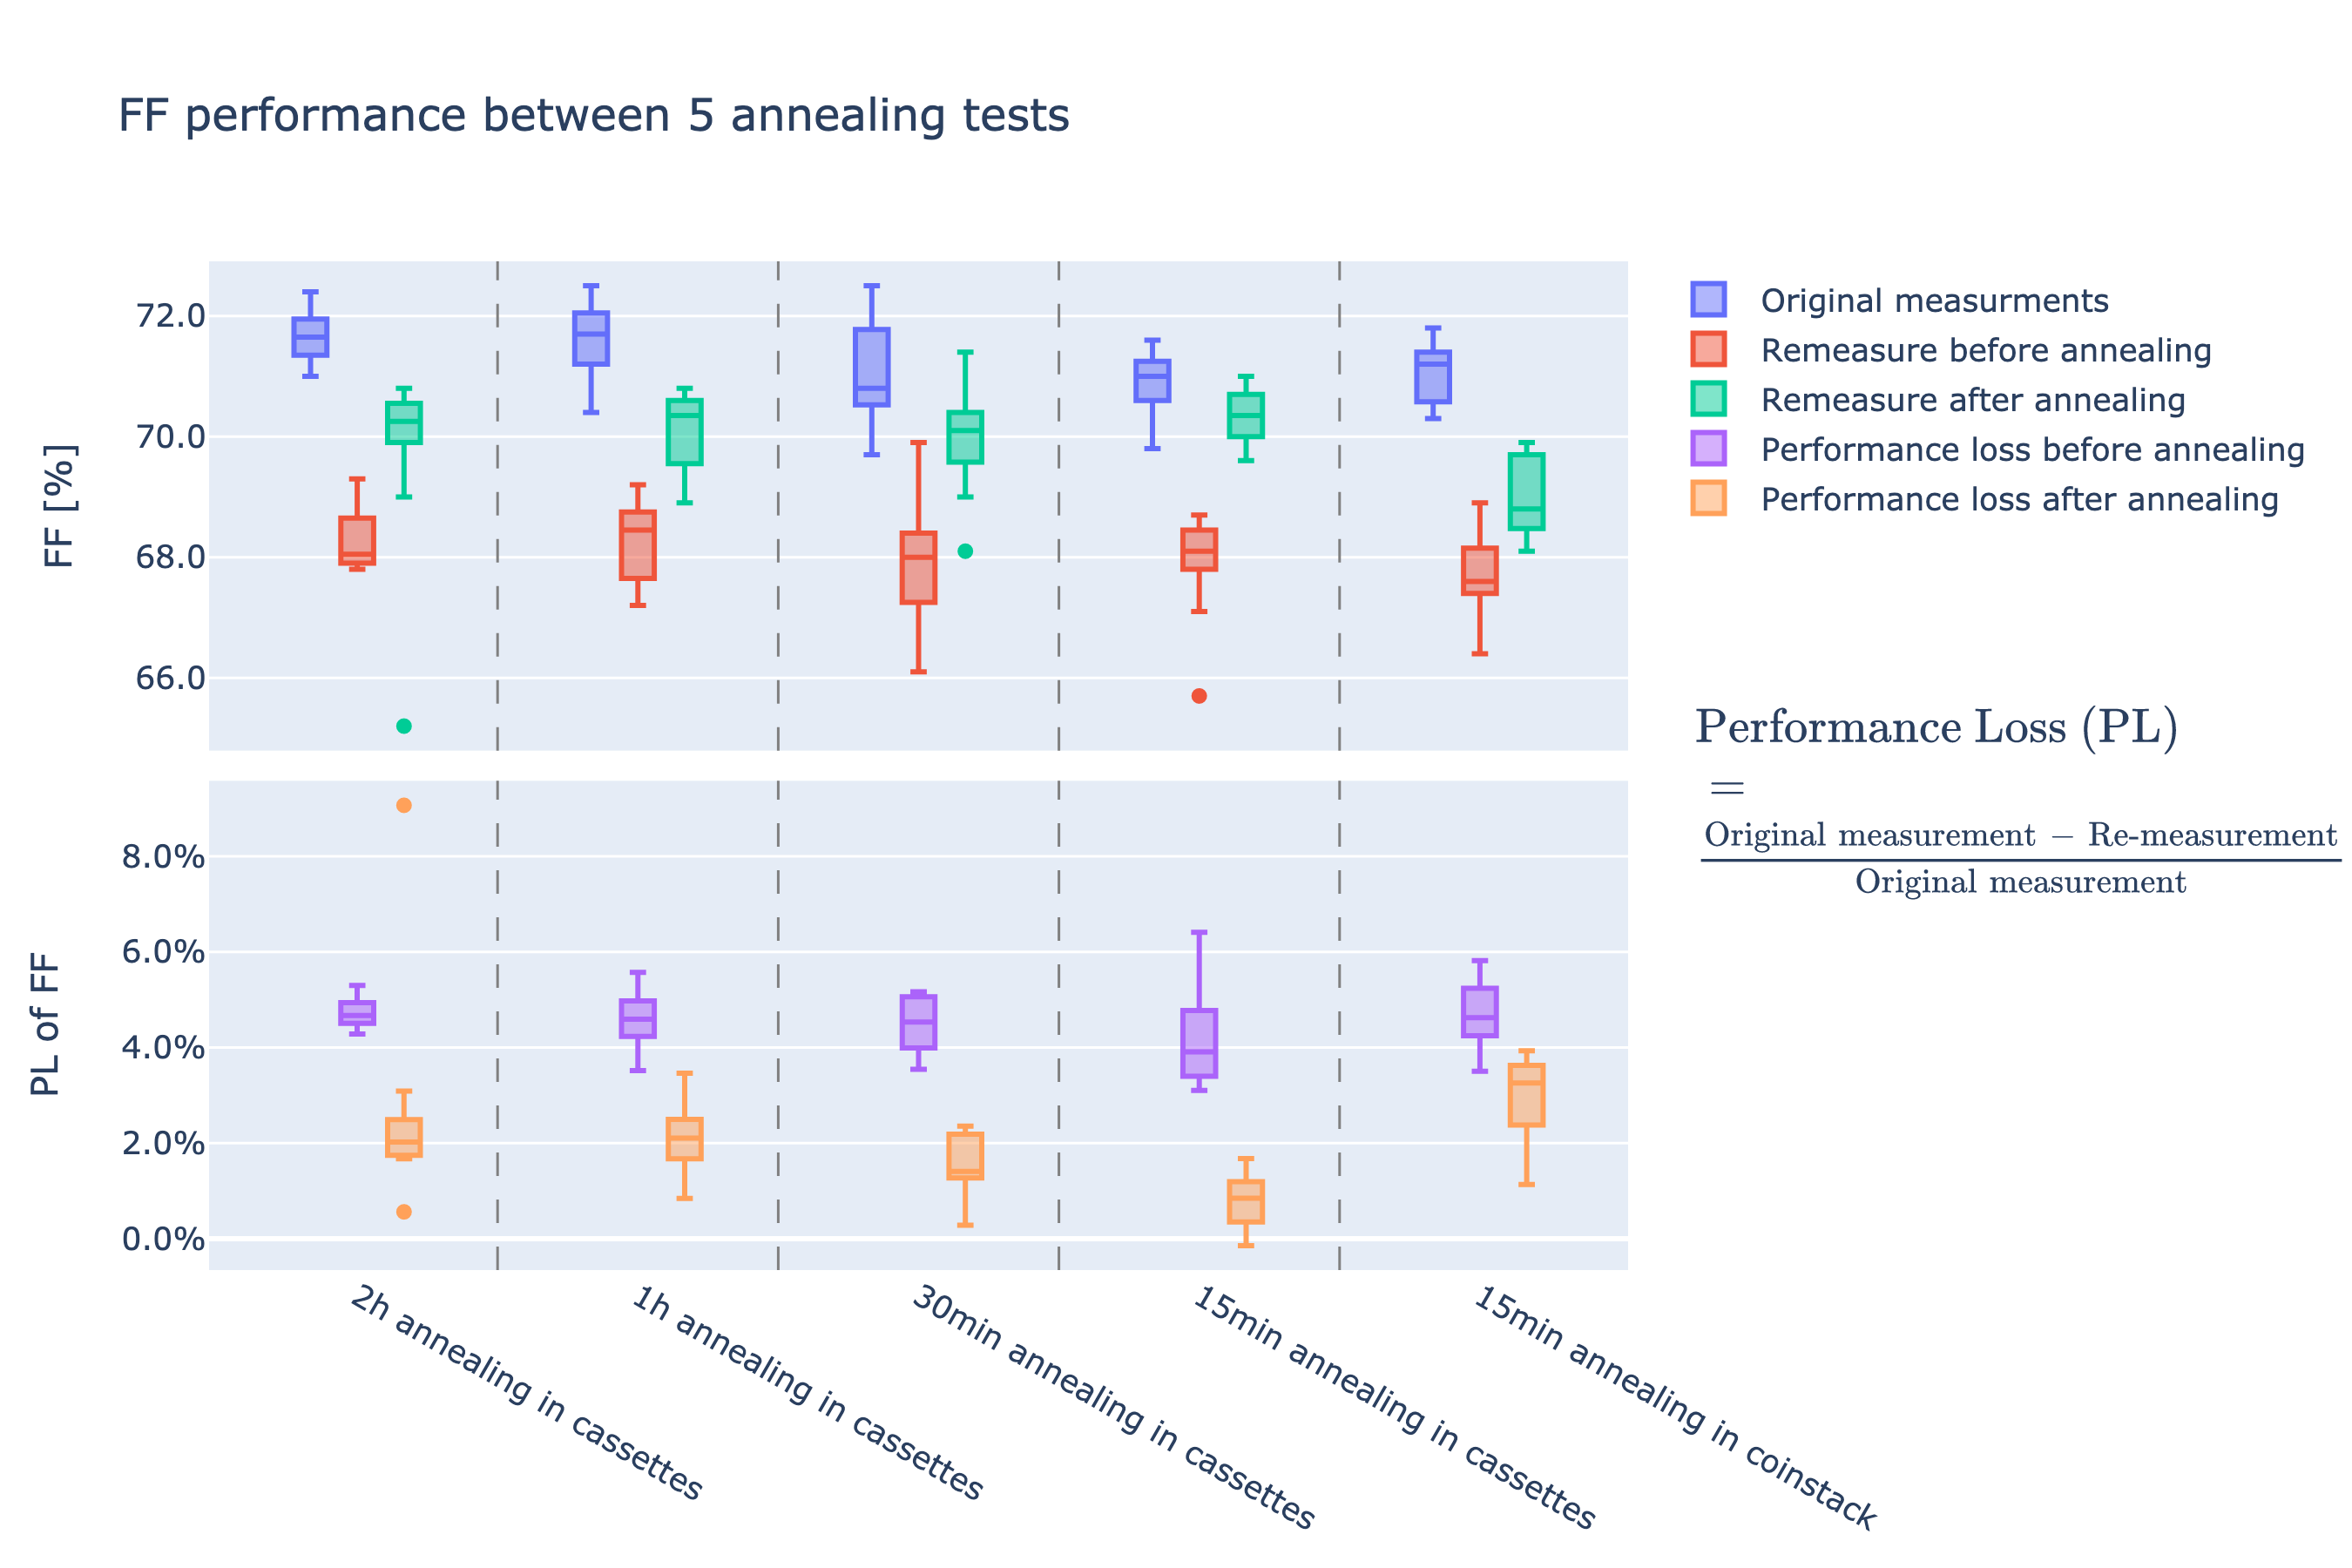

In [160]:
Annealing_test_wide_FF = Annealing_test_wide[Annealing_test_wide['FF_PLaA'] < 0.1]
Annealing_test_wide_FF = Annealing_test_wide_FF[Annealing_test_wide_FF['FF_PLbA'] < 0.1]

fig_FF = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_FF.add_trace(
    go.Box(y=Annealing_test_wide_FF['FF [%]'], x = Annealing_test_wide_FF["Notes"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_FF.add_trace(
    go.Box(y=Annealing_test_wide_FF['FF [%].1'], x = Annealing_test_wide_FF["Notes"], 
           name = "Remeasure before annealing", offsetgroup = "B"),
    row=1, col=1
)

fig_FF.add_trace(
    go.Box(y=Annealing_test_wide_FF['FF [%].2'], x = Annealing_test_wide_FF["Notes"], 
           name = "Remeasure after annealing", offsetgroup = "C"),
    row=1, col=1,
)

fig_FF.add_trace(
    go.Box(y=Annealing_test_wide_FF['FF_PLbA'], x = Annealing_test_wide_FF["Notes"], 
           name = "Performance loss before annealing", offsetgroup = "B"),
    row=2, col=1
)

fig_FF.add_trace(
    go.Box(y=Annealing_test_wide_FF['FF_PLaA'], x = Annealing_test_wide_FF["Notes"], 
           name = "Performance loss after annealing", offsetgroup = "C"),
    row=2, col=1
)
vx = 0.5
fig_FF.add_vline(x=vx, line_width=1, line_dash="dash", line_color="grey")
fig_FF.add_vline(x=vx+1, line_width=1, line_dash="dash", line_color="grey")
fig_FF.add_vline(x=vx+2, line_width=1, line_dash="dash", line_color="grey")
fig_FF.add_vline(x=vx+3, line_width=1, line_dash="dash", line_color="grey")

fig_FF.add_annotation(yref='paper', xref='paper', y=0.5,x = 1.35,showarrow=False, font_size =18,
            text=r'$ \textrm{ Performance Loss (PL) } \\\ = \\\ \frac{\textrm{Original measurement } - \textrm{ Re-measurement}}{\textrm{Original measurement}}$')

fig_FF.update_layout(title="FF performance between 5 annealing tests",
                     boxmode='group', height=600, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="FF [%]", tick0 = 62, dtick=2.0, tickformat=".1f"),
                     yaxis2=dict(title="PL of FF", dtick=0.02,  tickformat=".1%")
                    ) 
fig_FF.show(renderer="png", scale=3, width=900, height=600)
fig_FF.write_image("2.2 Fill factor performance between 5 annealing tests.png", scale=3, width=900, height=600) 

# Section 4 : Efficiency η 

Efficiency η : the higher the better.

In general, η < 20 %

$ η =  \frac{FF * Voc * Isc}{Pin}  $

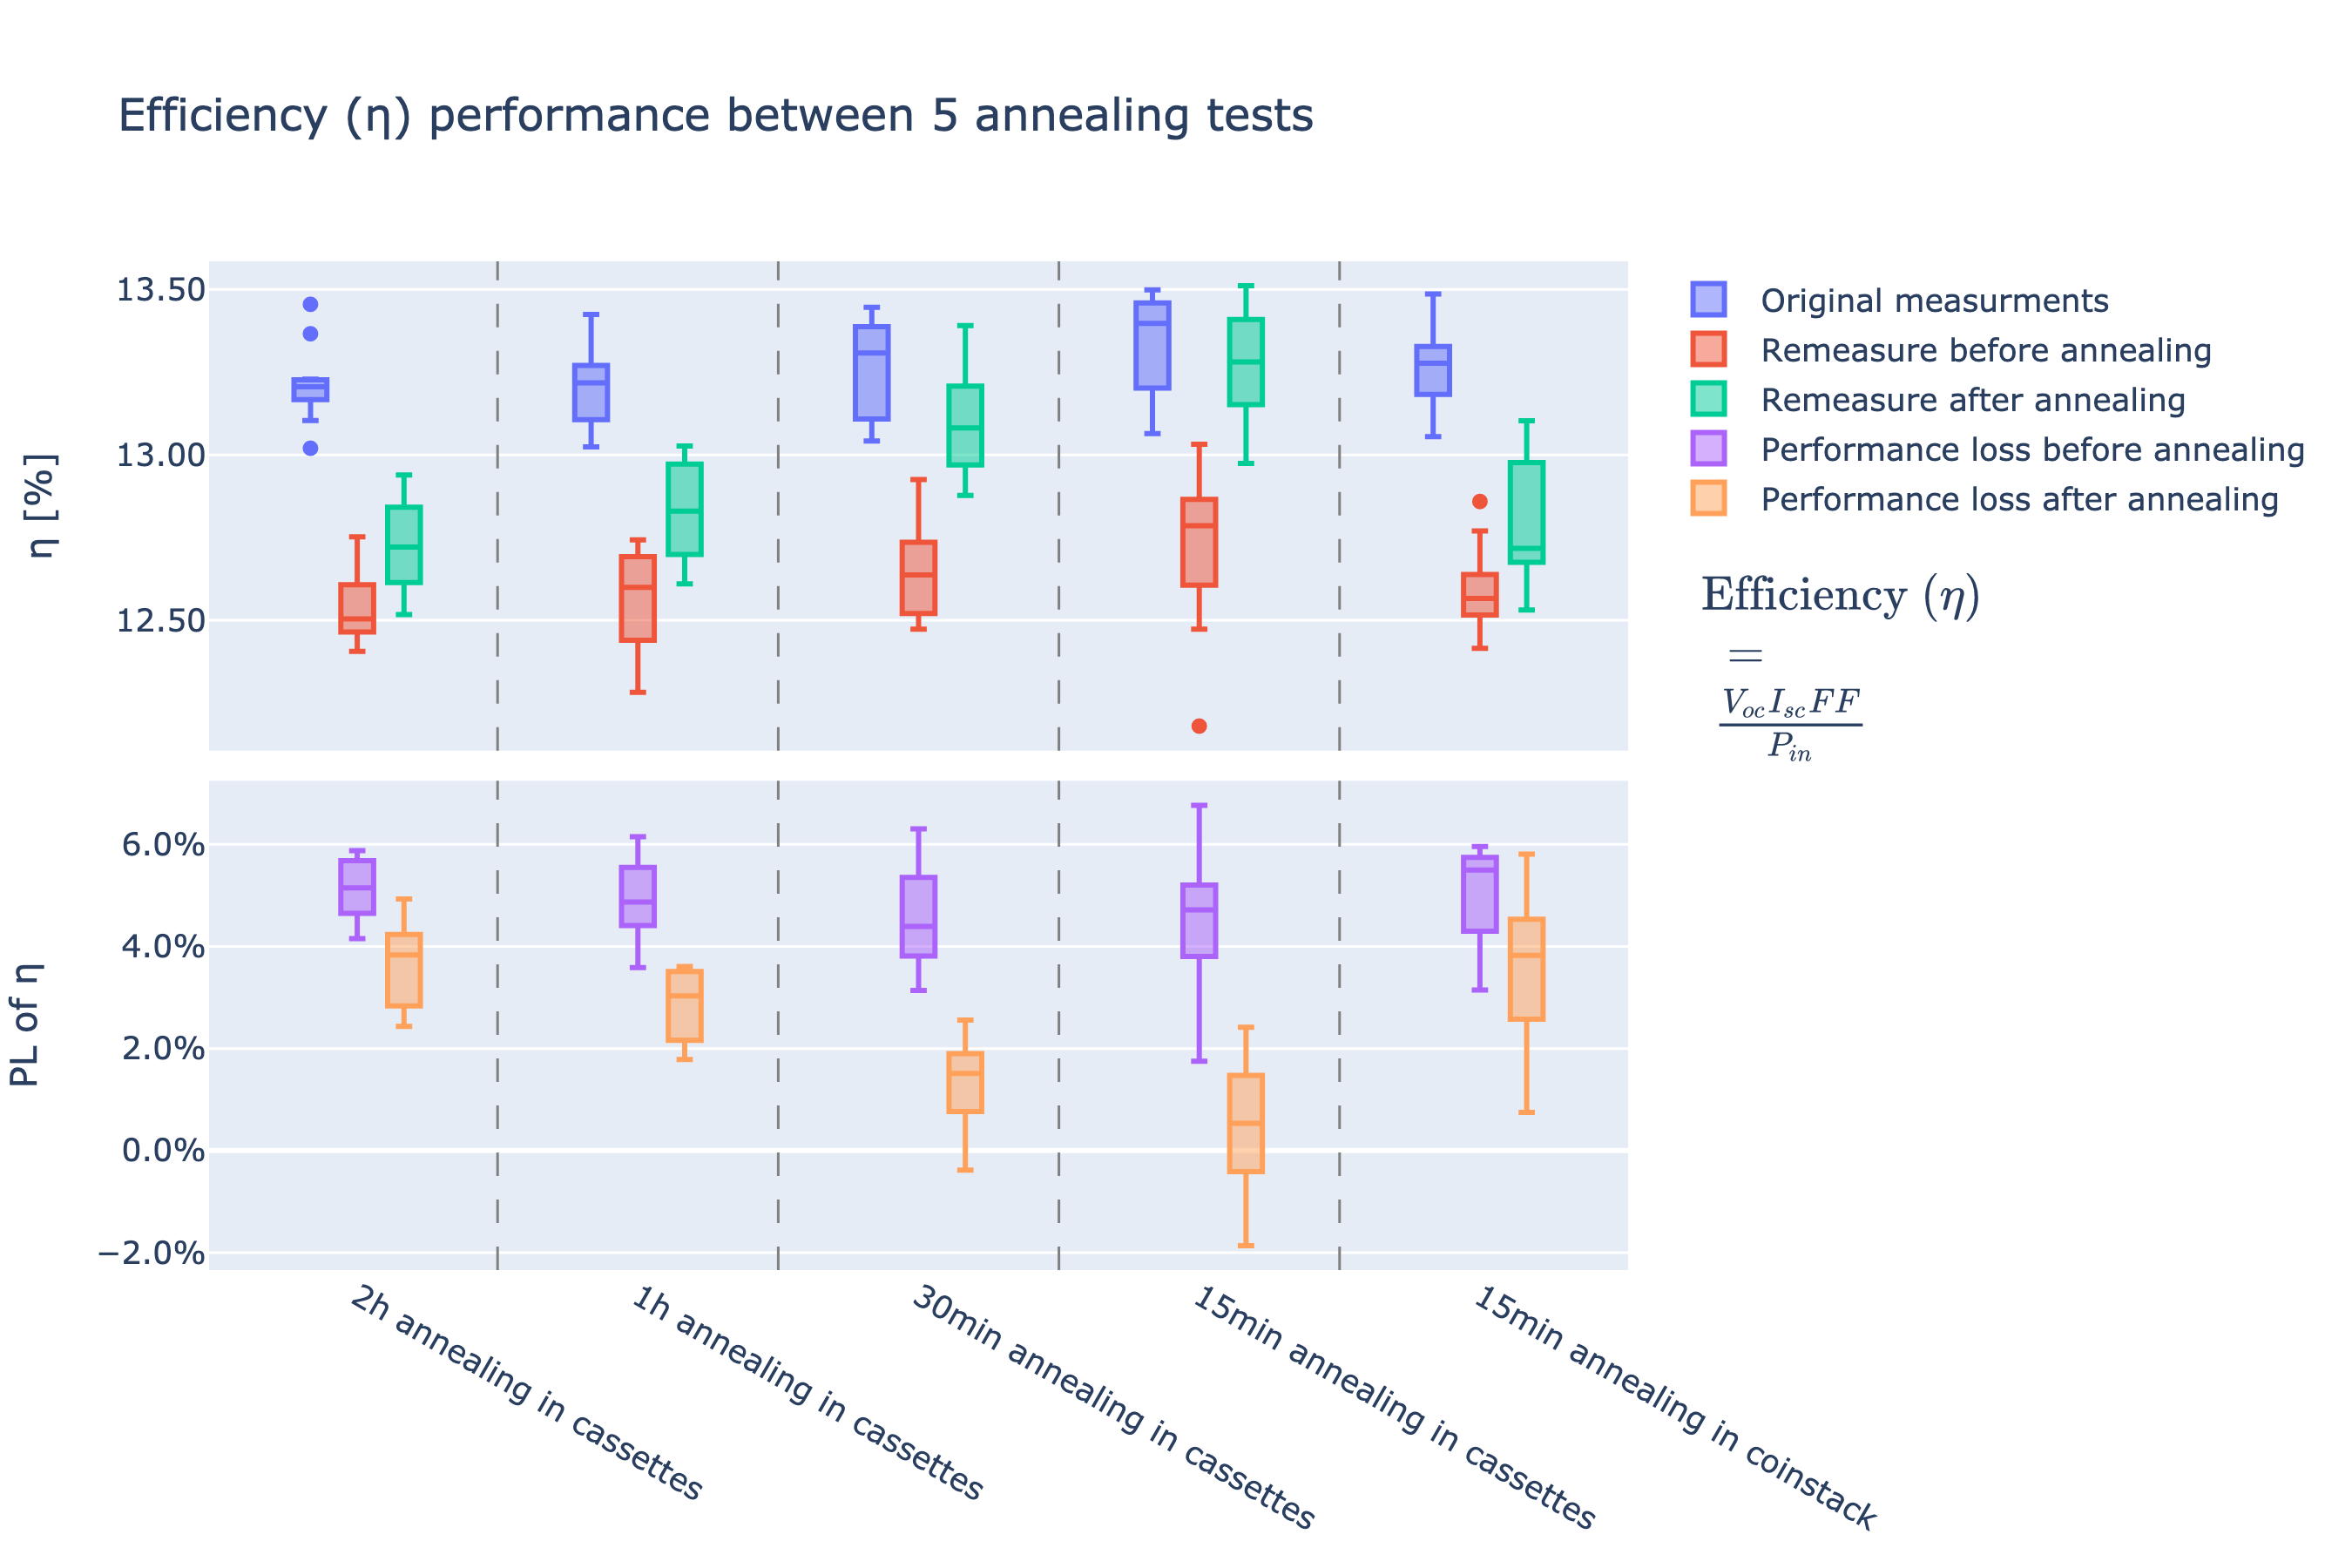

In [161]:
Annealing_test_wide_η = Annealing_test_wide[Annealing_test_wide['η_PLaA'] < 0.1]
Annealing_test_wide_η = Annealing_test_wide_η[Annealing_test_wide_η['η_PLbA'] < 0.1]

fig_η = make_subplots(rows=2, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_η.add_trace(
    go.Box(y=Annealing_test_wide_η['η [%]'], x = Annealing_test_wide_η["Notes"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_η.add_trace(
    go.Box(y=Annealing_test_wide_η['η [%].1'], x = Annealing_test_wide_η["Notes"], 
           name = "Remeasure before annealing", offsetgroup = "B"),
    row=1, col=1
)

fig_η.add_trace(
    go.Box(y=Annealing_test_wide_η['η [%].2'], x = Annealing_test_wide_η["Notes"], 
           name = "Remeasure after annealing", offsetgroup = "C"),
    row=1, col=1,
)

fig_η.add_trace(
    go.Box(y=Annealing_test_wide_η['η_PLbA'], x = Annealing_test_wide_η["Notes"], 
           name = "Performance loss before annealing", offsetgroup = "B"),
    row=2, col=1
)

fig_η.add_trace(
    go.Box(y=Annealing_test_wide_η['η_PLaA'], x = Annealing_test_wide_η["Notes"], 
           name = "Performance loss after annealing", offsetgroup = "C"),
    row=2, col=1
)

fig_η.add_annotation(yref='paper', xref='paper', y=0.6,x = 1.25,showarrow=False, font_size =20,
            text=r'$ \textrm{Efficiency (η) } \\\ = \\\ \frac{V_{oc}I_{sc}FF}{P_{in}}$')


vx = 0.5
fig_η.add_vline(x=vx, line_width=1, line_dash="dash", line_color="grey")
fig_η.add_vline(x=vx+1, line_width=1, line_dash="dash", line_color="grey")
fig_η.add_vline(x=vx+2, line_width=1, line_dash="dash", line_color="grey")
fig_η.add_vline(x=vx+3, line_width=1, line_dash="dash", line_color="grey")

fig_η.update_layout(title="Efficiency (η) performance between 5 annealing tests",
                    boxmode='group', height=600, width=900,
                     boxgap=0.5,
                     yaxis=dict(title="η [%]", tick0 = 10, dtick=.5, tickformat=".2f"),
                     yaxis2=dict(title="PL of η", dtick=0.02,tickformat=".1%")
                    ) 
fig_η.show(renderer="png", scale=3, width=900, height=600)
fig_η.write_image("2.3 Efficiency (η) performance between 5 annealing tests.png", scale=3, width=900, height=600) 

# Section 5: Series Resistance Rs

The main impact of series resistance is to reduce the fill factor, although excessively high values may also reduce the short-circuit current.
The lower the better.

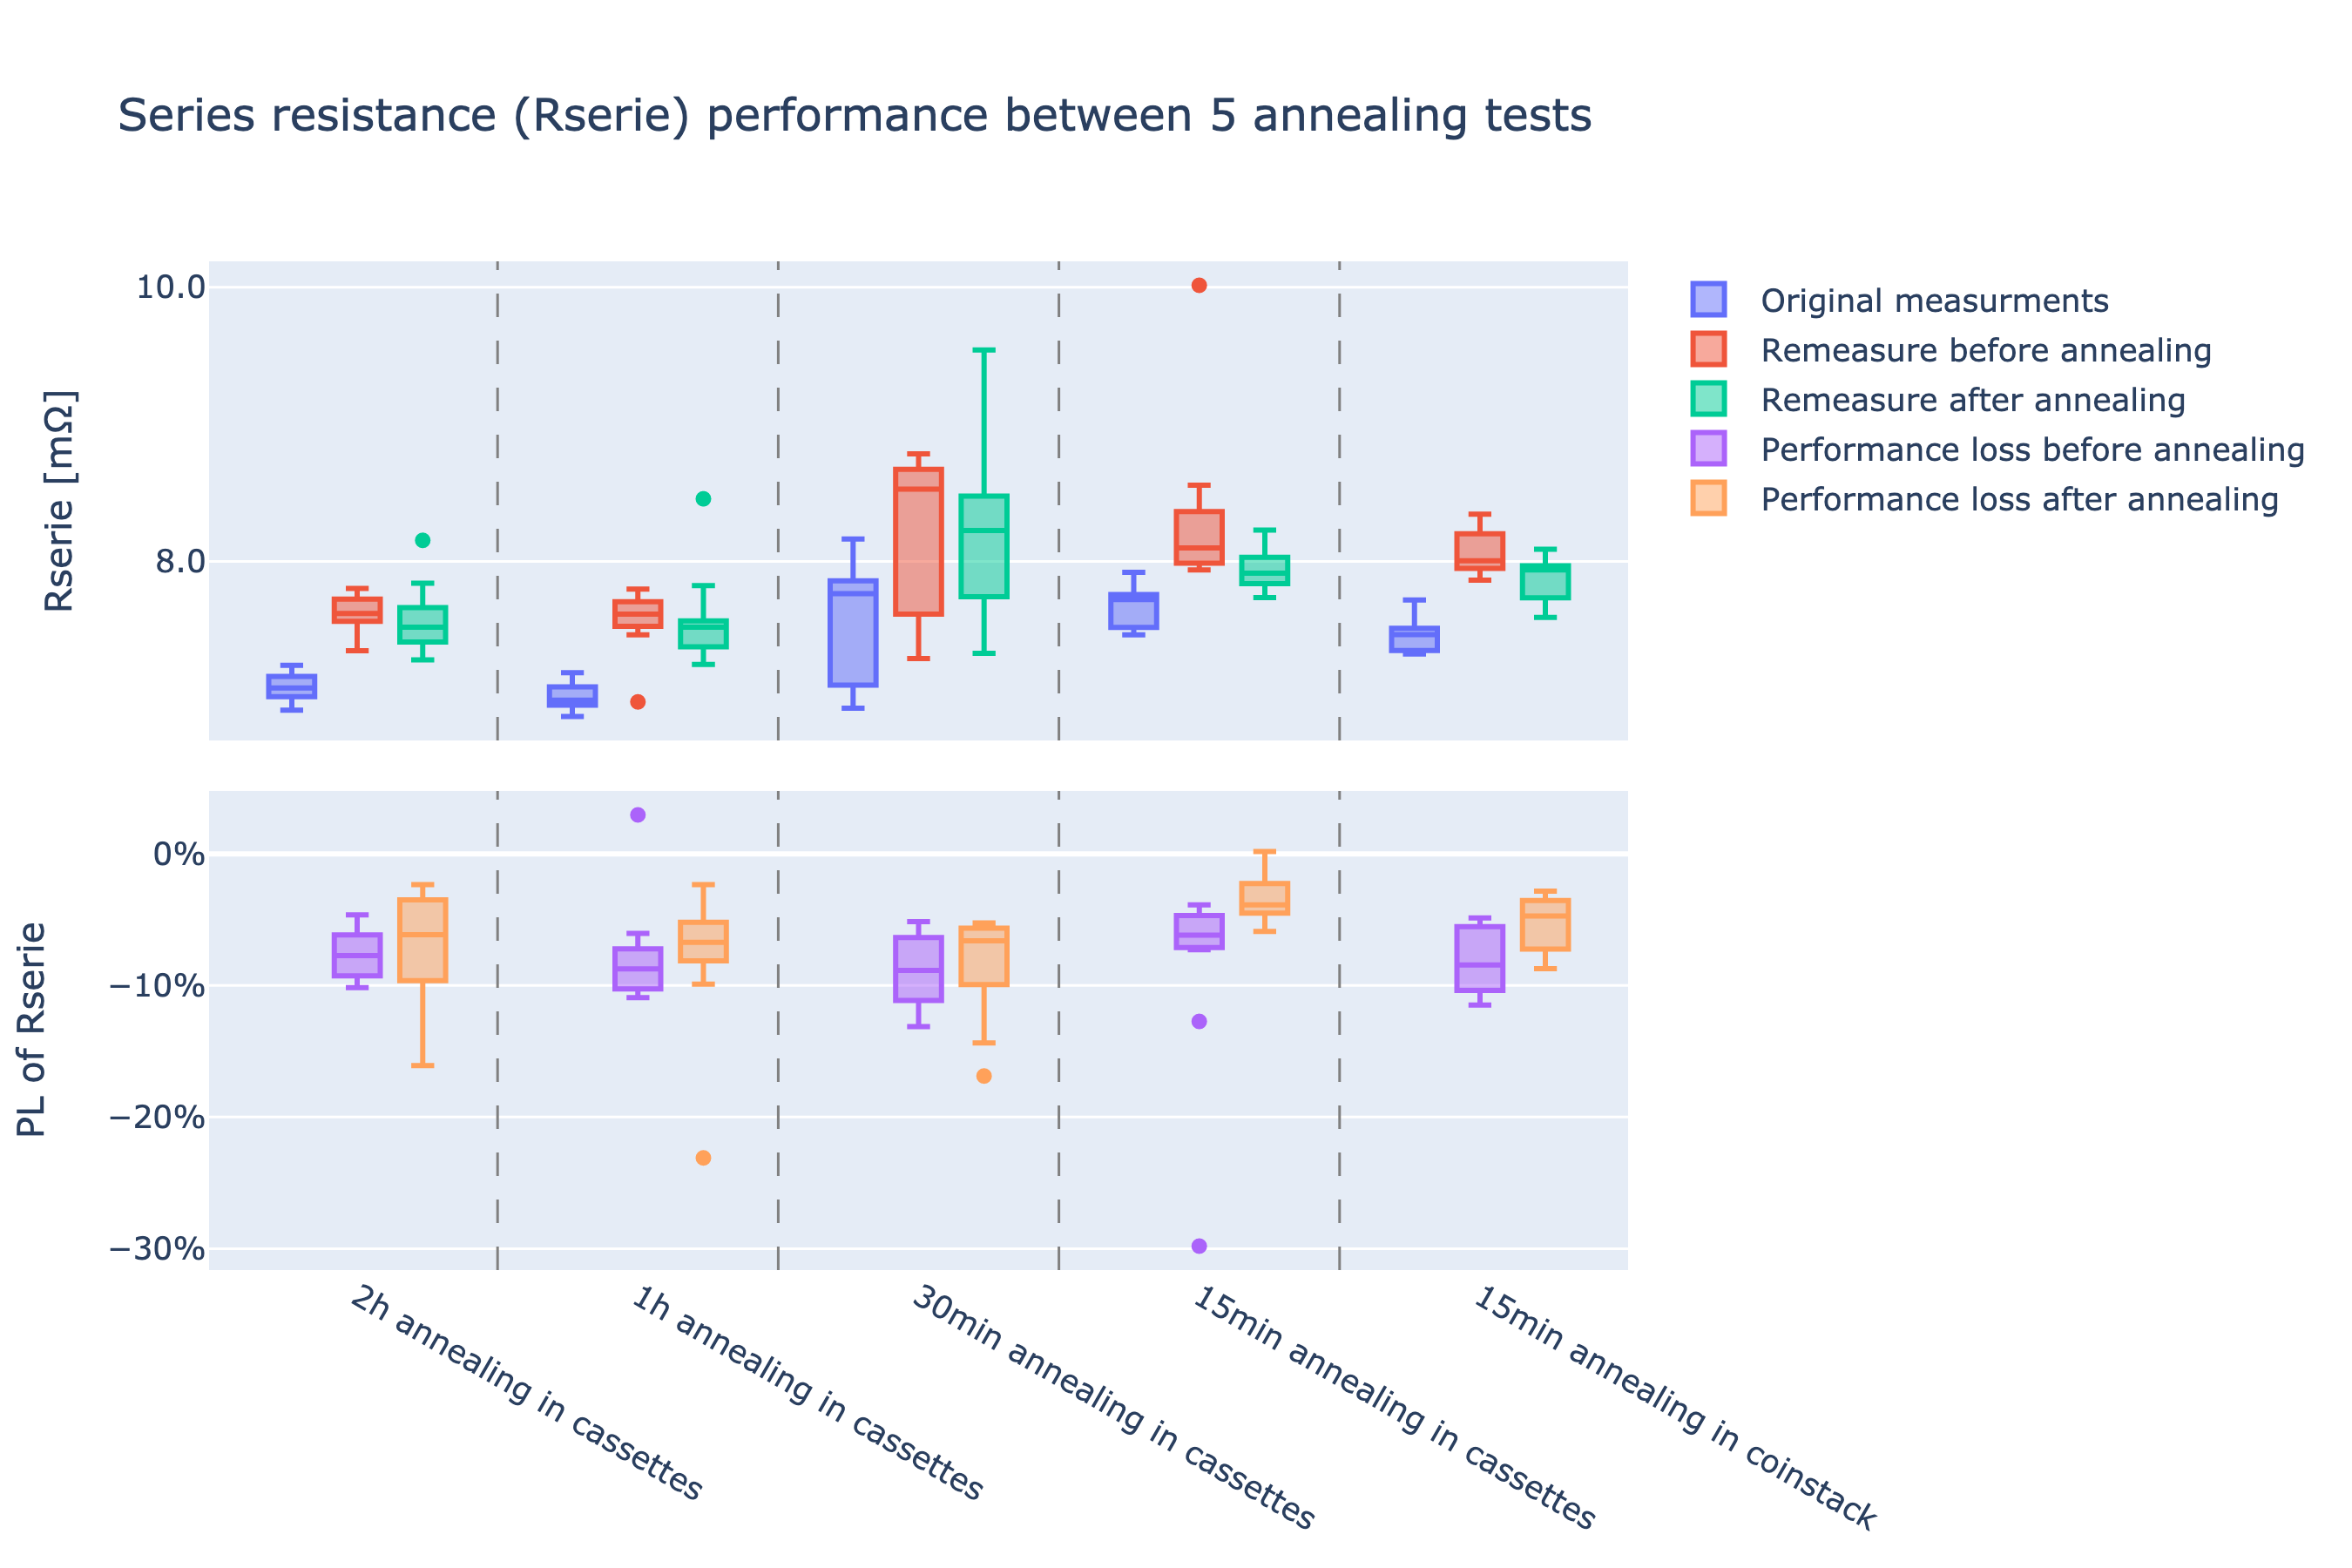

In [162]:
Annealing_test_wide_Rserie = Annealing_test_wide[Annealing_test_wide['Rserie_PLaA'] > -0.3]
Annealing_test_wide_Rserie = Annealing_test_wide_Rserie[Annealing_test_wide_Rserie['Rserie_PLbA'] > -0.3]

fig_Rserie = make_subplots(rows=2, cols=1,shared_xaxes = True, vertical_spacing=0.05)

fig_Rserie.add_trace(
    go.Box(y=Annealing_test_wide_Rserie['Rserie [mΩ]'], x = Annealing_test_wide_Rserie["Notes"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_Rserie.add_trace(
    go.Box(y=Annealing_test_wide_Rserie['Rserie [mΩ].1'], x = Annealing_test_wide_Rserie["Notes"], 
           name = "Remeasure before annealing", offsetgroup = "B"),
    row=1, col=1
)

fig_Rserie.add_trace(
    go.Box(y=Annealing_test_wide_Rserie['Rserie [mΩ].2'], x = Annealing_test_wide_Rserie["Notes"], 
           name = "Remeasure after annealing", offsetgroup = "C"),
    row=1, col=1
)

fig_Rserie.add_trace(
    go.Box(y=Annealing_test_wide_Rserie['Rserie_PLbA'], x = Annealing_test_wide_Rserie["Notes"], 
           name = "Performance loss before annealing", offsetgroup = "B"),
    row=2, col=1
)

fig_Rserie.add_trace(
    go.Box(y=Annealing_test_wide_Rserie['Rserie_PLaA'], x = Annealing_test_wide_Rserie["Notes"], 
           name = "Performance loss after annealing", offsetgroup = "C"),
    row=2, col=1
)

vx = 0.5
fig_Rserie.add_vline(x=vx, line_width=1, line_dash="dash", line_color="grey")
fig_Rserie.add_vline(x=vx+1, line_width=1, line_dash="dash", line_color="grey")
fig_Rserie.add_vline(x=vx+2, line_width=1, line_dash="dash", line_color="grey")
fig_Rserie.add_vline(x=vx+3, line_width=1, line_dash="dash", line_color="grey")

fig_Rserie.update_layout(title="Series resistance (Rserie) performance between 5 annealing tests",
                         boxmode='group', height=700, width=900,
                     yaxis=dict(title="Rserie [mΩ]", tick0 = 8, dtick=2.0, tickformat=".1f"),
                     yaxis2=dict(title="PL of Rserie", dtick=0.1,tickformat=".0%")
                    )
fig_Rserie.show(renderer="png", scale=3, width=900, height=600)
fig_Rserie.write_image("2.4 Series resistance (Rserie) performance between 5 annealing tests.png", scale=3, width=900, height=600) 

Conclusion : 15 min annealing in cassettes is good, increase in annealing time does not improve performance of solar cells.

# Section 6: Shunt Resistance Rshunt

In [ ]:
Significant power losses caused by the presence of a shunt resistance, RSH, are typically due to manufacturing defects, rather than poor solar cell design. 
The higher the better.

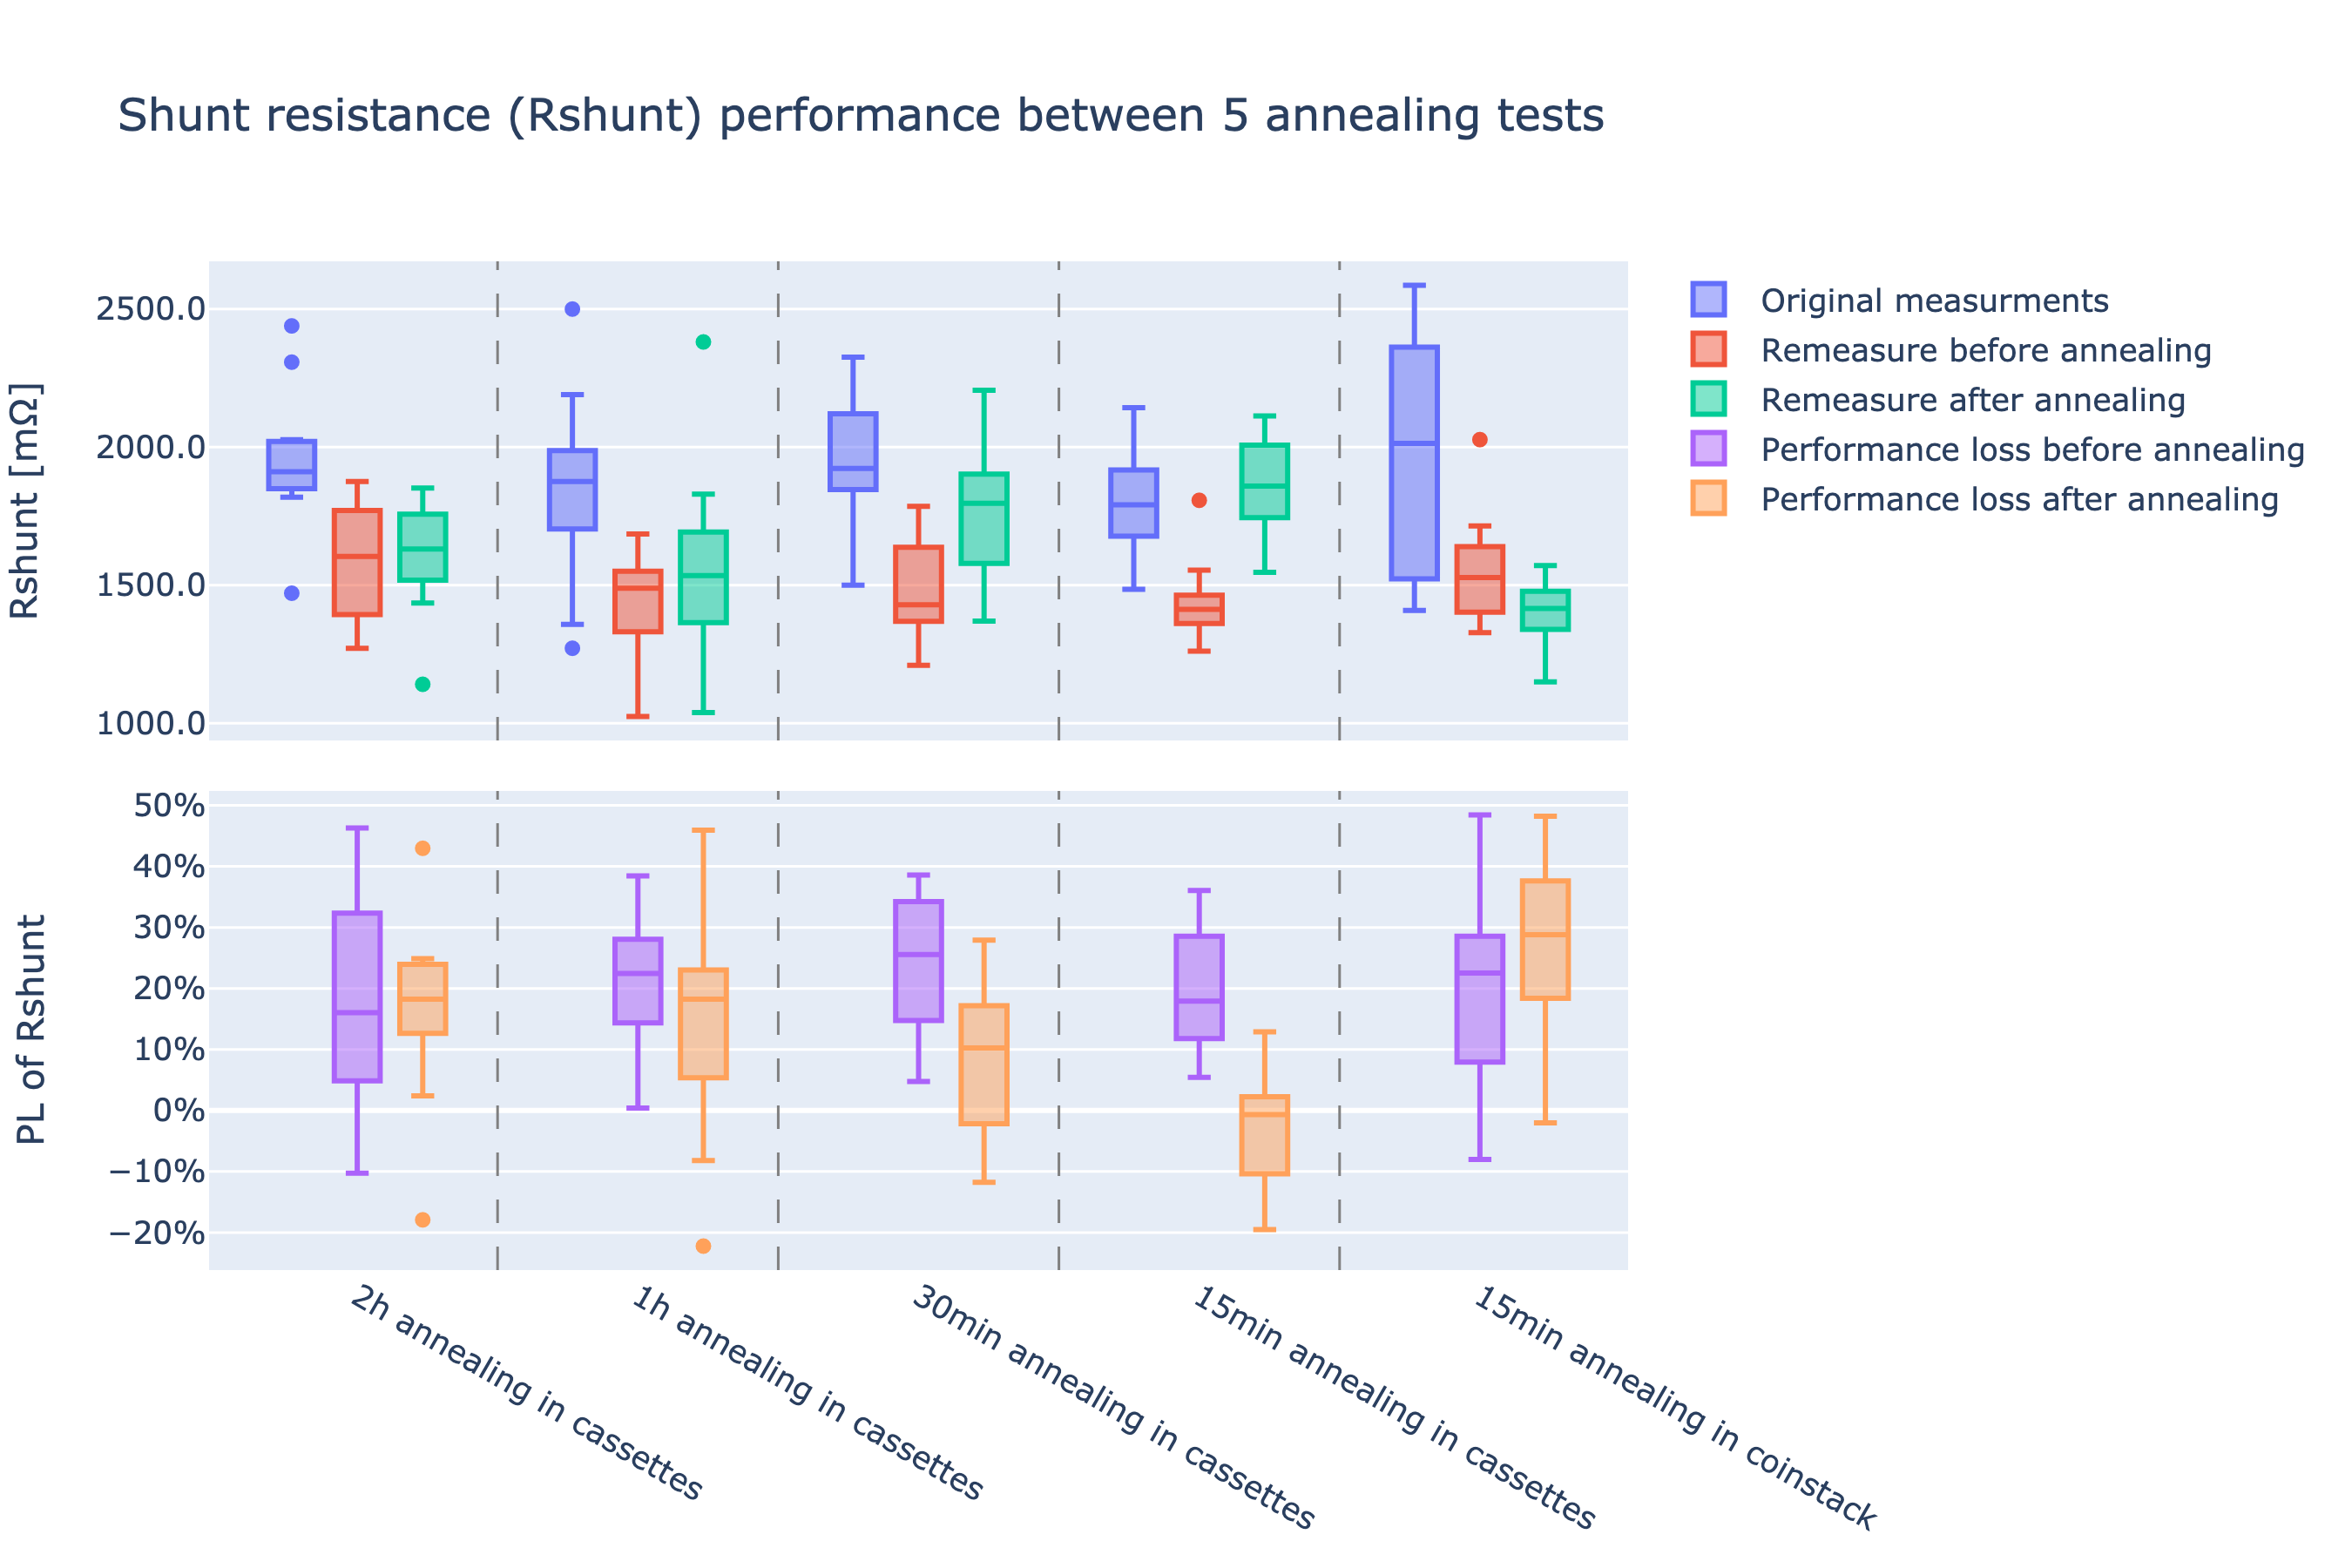

In [163]:
Annealing_test_wide_Rshunt = Annealing_test_wide[Annealing_test_wide['Rshunt_PLaA'] < 0.6]
Annealing_test_wide_Rshunt = Annealing_test_wide_Rshunt[Annealing_test_wide_Rshunt['Rshunt_PLbA'] < 0.6]

fig_Rshunt = make_subplots(rows=2, cols=1,shared_xaxes = True, vertical_spacing=0.05)

fig_Rshunt.add_trace(
    go.Box(y=Annealing_test_wide_Rshunt['Rshunt [mΩ]'], x = Annealing_test_wide_Rshunt["Notes"], 
           name = "Original measurments", offsetgroup = "A"),
    row=1, col=1
)

fig_Rshunt.add_trace(
    go.Box(y=Annealing_test_wide_Rshunt['Rshunt [mΩ].1'], x = Annealing_test_wide_Rshunt["Notes"], 
           name = "Remeasure before annealing", offsetgroup = "B"),
    row=1, col=1
)

fig_Rshunt.add_trace(
    go.Box(y=Annealing_test_wide_Rshunt['Rshunt [mΩ].2'], x = Annealing_test_wide_Rshunt["Notes"], 
           name = "Remeasure after annealing", offsetgroup = "C"),
    row=1, col=1
)

fig_Rshunt.add_trace(
    go.Box(y=Annealing_test_wide_Rshunt['Rshunt_PLbA'], x = Annealing_test_wide_Rshunt["Notes"], 
           name = "Performance loss before annealing", offsetgroup = "B"),
    row=2, col=1
)

fig_Rshunt.add_trace(
    go.Box(y=Annealing_test_wide_Rshunt['Rshunt_PLaA'], x = Annealing_test_wide_Rshunt["Notes"], 
           name = "Performance loss after annealing", offsetgroup = "C"),
    row=2, col=1
)

vx = 0.5
fig_Rshunt.add_vline(x=vx, line_width=1, line_dash="dash", line_color="grey")
fig_Rshunt.add_vline(x=vx+1, line_width=1, line_dash="dash", line_color="grey")
fig_Rshunt.add_vline(x=vx+2, line_width=1, line_dash="dash", line_color="grey")
fig_Rshunt.add_vline(x=vx+3, line_width=1, line_dash="dash", line_color="grey")

fig_Rshunt.update_layout(title="Shunt resistance (Rshunt) performance between 5 annealing tests",
                         boxmode='group', height=700, width=900,
                         yaxis=dict(title="Rshunt [mΩ]", tickformat=".1f"),
                         yaxis2=dict(title="PL of Rshunt", dtick=0.1,tickformat=".0%")
                    )
fig_Rshunt.write_image("2.5 Shunt resistance (Rshunt) performance between 5 annealing tests.png", scale=3, width=900, height=600) 
fig_Rshunt.show(renderer="png", scale=3, width=900, height=600)

# Conclusion: 
### Six indicatiors have been examined individually, which all point to the same conclusion:  
### 15 min annealing in cassettes provides the best performance recovery.